In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
master_df = pd.read_csv("ca.csv")

In [3]:
master_df.head()

,DATE,STATUS,QLANG,DEM_GENDER,DEM_AGE,DEM_ABOR,DEM_ABOR_TYPE,DEM_STDNT,DEM_VET,DEM_HEALTH,...,FENT_NMU_NTY,HYD_NMU_NTY,HYDM_NMU_NTY,METH_NMU_NTY,MORPH_NMU_NTY,OXY_NMU_NTY,OXYM_NMU_NTY,SUF_NMU_NTY,TAP_NMU_NTY,TRAM_NMU_NTY
0,2017-09-28 18:13:25,3,1,1,18,0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-10-18 18:46:34,3,1,1,18,0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-09-29 06:58:50,3,1,1,24,0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-10-03 17:58:19,3,1,1,16,0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-10-25 21:09:49,3,1,1,21,0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
columns_to_drop = ['DATE', 'STATUS', 'QLANG', 'DEM_PREGMNTH', 'HEALTH_SETTING_PRE', 
                   'HEALTH_SETTING_HOS', 'HEALTH_SETTING_OUT', 'HEALTH_SETTING_HOME', 
                   'HEALTH_SETTING_PRIV', 'HEALTH_SETTING_OTH', 'HEALTH_ROLE', 
                   'HPC_USE', 'HPC_SELL', 'QTIME', 'VMOBILEDEVICE', 'START_DATE', 
                   'ORDER_FENT', 'ORDER_BUP', 'ORDER_METH', 'ORDER_MORPH', 'ORDER_OXY', 
                   'ORDER_OXYM', 'ORDER_TRAM', 'ORDER_TAP', 'ORDER_COD', 'ORDER_HYD', 
                   'ORDER_HYDM', 'ORDER_SUF', 'WT', 'OXY_USE', 'THC_USE', 'STIM_USE',
                   'METH_USE', 'BUP_USE', 'TAP_USE', 'HYDM_USE', 'HYD_USE', 'COD_USE',
                   'SUF_USE', 'MORPH_USE', 'OXYM_USE', 'TRAM_USE', 'FENT_USE', 'BENZ_USE']

working_df = master_df.drop(columns_to_drop, axis = 1)
working_df.head()

,DEM_GENDER,DEM_AGE,DEM_ABOR,DEM_ABOR_TYPE,DEM_STDNT,DEM_VET,DEM_HEALTH,DEM_LOCATION,DEM_REGION,DEM_POSTAL,...,FENT_NMU_NTY,HYD_NMU_NTY,HYDM_NMU_NTY,METH_NMU_NTY,MORPH_NMU_NTY,OXY_NMU_NTY,OXYM_NMU_NTY,SUF_NMU_NTY,TAP_NMU_NTY,TRAM_NMU_NTY
0,1,18,0,NaN,0,0,0,2,1,B0N,...,0,0,0,0,0,0,0,0,0,0
1,1,18,0,NaN,1,0,0,1,1,A1B,...,0,0,0,0,0,0,0,0,0,0
2,1,24,0,NaN,0,0,0,4,1,E5C,...,0,0,0,0,0,0,0,0,0,0
3,1,16,0,NaN,1,0,0,4,1,E3A,...,0,0,0,0,0,0,0,0,0,0
4,1,21,0,NaN,1,0,0,2,1,A9A,...,0,0,0,0,0,0,0,0,0,0


In [5]:
med_nmu = ['FENT_NMU', 'BUP_NMU', 'METH_NMU',
       'MORPH_NMU', 'OXY_NMU', 'OXYM_NMU', 'TRAM_NMU', 'TAP_NMU',
       'COD_NMU', 'COTC_NMU', 'HYD_NMU', 'HYDM_NMU', 'SUF_NMU',
       'STIM_NMU', 'BENZ_NMU', 'THC_NMU', 'OTH_RX_DRUG_USE']

working_df['MED_NMU'] = working_df[med_nmu].sum(axis = 1, numeric_only = True)

In [6]:
hard_drug = ['CAN_REC_USE','COKE_USE','CRACK_USE','MDMA_USE','GHB_USE','HAL_USE','INH_USE','SPEED_USE',
       'NPFENT_USE','HEROIN_USE','KET_USE','MEPH_USE','SPICE_USE','SAL_USE','STER_USE']

def modifier(n):
    if n == 1:
        return 0
    else: return 1

working_df["DRUG_HISTORY"] = working_df[hard_drug].applymap(modifier).sum(axis = 1, numeric_only=True)

In [7]:
aborg_df = working_df[working_df['DEM_ABOR'] == 1]
aborg_df.head()

,DEM_GENDER,DEM_AGE,DEM_ABOR,DEM_ABOR_TYPE,DEM_STDNT,DEM_VET,DEM_HEALTH,DEM_LOCATION,DEM_REGION,DEM_POSTAL,...,HYDM_NMU_NTY,METH_NMU_NTY,MORPH_NMU_NTY,OXY_NMU_NTY,OXYM_NMU_NTY,SUF_NMU_NTY,TAP_NMU_NTY,TRAM_NMU_NTY,MED_NMU,DRUG_HISTORY
22,1,33,1,1.0,0,0,1,2,1,V9L,...,0,0,0,0,0,0,0,0,5.0,1
32,1,29,1,1.0,0,0,0,2,1,B1S,...,0,0,0,0,0,0,0,0,0.0,0
47,1,34,1,1.0,0,0,0,2,1,b3h,...,0,0,0,0,0,0,0,0,1.0,0
49,1,26,1,2.0,0,1,1,3,1,K9J,...,0,0,0,0,0,0,0,0,6.0,13
51,1,25,1,1.0,1,0,1,4,1,e1a,...,0,0,0,0,0,0,0,0,2.0,4


In [8]:
aborg_df.count()

DEM_GENDER       433
DEM_AGE          433
DEM_ABOR         433
DEM_ABOR_TYPE    433
DEM_STDNT        433
                ... 
SUF_NMU_NTY      433
TAP_NMU_NTY      433
TRAM_NMU_NTY     433
MED_NMU          433
DRUG_HISTORY     433
Length: 143, dtype: int64

In [9]:
non_aborg_df = working_df[working_df['DEM_ABOR'] == 0]
non_aborg_df.head()

,DEM_GENDER,DEM_AGE,DEM_ABOR,DEM_ABOR_TYPE,DEM_STDNT,DEM_VET,DEM_HEALTH,DEM_LOCATION,DEM_REGION,DEM_POSTAL,...,HYDM_NMU_NTY,METH_NMU_NTY,MORPH_NMU_NTY,OXY_NMU_NTY,OXYM_NMU_NTY,SUF_NMU_NTY,TAP_NMU_NTY,TRAM_NMU_NTY,MED_NMU,DRUG_HISTORY
0,1,18,0,NaN,0,0,0,2,1,B0N,...,0,0,0,0,0,0,0,0,0.0,0
1,1,18,0,NaN,1,0,0,1,1,A1B,...,0,0,0,0,0,0,0,0,0.0,0
2,1,24,0,NaN,0,0,0,4,1,E5C,...,0,0,0,0,0,0,0,0,0.0,0
3,1,16,0,NaN,1,0,0,4,1,E3A,...,0,0,0,0,0,0,0,0,0.0,0
4,1,21,0,NaN,1,0,0,2,1,A9A,...,0,0,0,0,0,0,0,0,1.0,2


In [10]:
print(aborg_df.columns.to_list())

['DEM_GENDER', 'DEM_AGE', 'DEM_ABOR', 'DEM_ABOR_TYPE', 'DEM_STDNT', 'DEM_VET', 'DEM_HEALTH', 'DEM_LOCATION', 'DEM_REGION', 'DEM_POSTAL', 'DEM_MARITAL', 'DEM_INCOME', 'DEM_EDU', 'DEM_PREG', 'HEALTH_RX', 'FENT_NMU', 'BUP_NMU', 'METH_NMU', 'MORPH_NMU', 'OXY_NMU', 'OXYM_NMU', 'TRAM_NMU', 'TAP_NMU', 'COD_NMU', 'COTC_NMU', 'HYD_NMU', 'HYDM_NMU', 'SUF_NMU', 'STIM_NMU', 'BENZ_NMU', 'THC_NMU', 'OTH_RX_DRUG_USE', 'TOB_FREQ_USE', 'ALC_FREQ_USE', 'CAN_REC_USE', 'CAN_MED_USE', 'COKE_USE', 'CRACK_USE', 'MDMA_USE', 'GHB_USE', 'HAL_USE', 'INH_USE', 'SPEED_USE', 'NPFENT_USE', 'HEROIN_USE', 'KET_USE', 'MEPH_USE', 'SPICE_USE', 'SAL_USE', 'STER_USE', 'HELP_SUB_USE', 'HELP_SUB_USE_ALC', 'HELP_SUB_USE_PREDRGS', 'HELP_SUB_USE_OTH', 'OPIOID_DEP_METH', 'OPIOID_DEP_BUP', 'OPIOID_DEP_HER', 'OPIOID_DEP_OTH', 'OPIOID_DEP_NO', 'PAIN_CHRONIC', 'PAIN_CHRONIC_DOC', 'PAIN_CHRONIC_RX', 'PAIN_ACUTE', 'PAIN_ACUTE_DOC', 'PAIN_ACUTE_RX', 'RXDRUGSAFE_HIGH', 'RXDRUGSAFE_PAIN', 'RXDRUGSAFE_THER', 'DRSHOP_NMU', 'DRSHOP_SELL', '

In [11]:
aborg_df.drop(['DEM_ABOR', 'DEM_ABOR_TYPE'], axis = 1, inplace = True)
aborg_df.head()

C:\Users\vansh\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,DEM_GENDER,DEM_AGE,DEM_STDNT,DEM_VET,DEM_HEALTH,DEM_LOCATION,DEM_REGION,DEM_POSTAL,DEM_MARITAL,DEM_INCOME,...,HYDM_NMU_NTY,METH_NMU_NTY,MORPH_NMU_NTY,OXY_NMU_NTY,OXYM_NMU_NTY,SUF_NMU_NTY,TAP_NMU_NTY,TRAM_NMU_NTY,MED_NMU,DRUG_HISTORY
22,1,33,0,0,1,2,1,V9L,1,7,...,0,0,0,0,0,0,0,0,5.0,1
32,1,29,0,0,0,2,1,B1S,2,5,...,0,0,0,0,0,0,0,0,0.0,0
47,1,34,0,0,0,2,1,b3h,6,4,...,0,0,0,0,0,0,0,0,1.0,0
49,1,26,0,1,1,3,1,K9J,1,7,...,0,0,0,0,0,0,0,0,6.0,13
51,1,25,1,0,1,4,1,e1a,2,3,...,0,0,0,0,0,0,0,0,2.0,4


In [12]:
non_aborg_df.drop(['DEM_ABOR', 'DEM_ABOR_TYPE'], axis = 1, inplace = True)
non_aborg_df.head()

C:\Users\vansh\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,DEM_GENDER,DEM_AGE,DEM_STDNT,DEM_VET,DEM_HEALTH,DEM_LOCATION,DEM_REGION,DEM_POSTAL,DEM_MARITAL,DEM_INCOME,...,HYDM_NMU_NTY,METH_NMU_NTY,MORPH_NMU_NTY,OXY_NMU_NTY,OXYM_NMU_NTY,SUF_NMU_NTY,TAP_NMU_NTY,TRAM_NMU_NTY,MED_NMU,DRUG_HISTORY
0,1,18,0,0,0,2,1,B0N,6,10,...,0,0,0,0,0,0,0,0,0.0,0
1,1,18,1,0,0,1,1,A1B,6,10,...,0,0,0,0,0,0,0,0,0.0,0
2,1,24,0,0,0,4,1,E5C,6,1,...,0,0,0,0,0,0,0,0,0.0,0
3,1,16,1,0,0,4,1,E3A,6,10,...,0,0,0,0,0,0,0,0,0.0,0
4,1,21,1,0,0,2,1,A9A,6,4,...,0,0,0,0,0,0,0,0,1.0,2


In [13]:
aborg_df['DRUG_HISTORY'].value_counts() 

0     155
15    102
1      56
2      25
4      21
3      13
6       9
5       9
13      8
14      7
7       7
9       6
8       6
12      4
10      3
11      2
Name: DRUG_HISTORY, dtype: int64

In [14]:
non_aborg_df['DRUG_HISTORY'].value_counts()

0     5999
1     1931
2      652
3      369
4      217
5      142
6       76
7       60
8       36
9       22
15      17
10      14
13      12
14      10
11       9
12       8
Name: DRUG_HISTORY, dtype: int64

In [40]:
aborg = aborg_df[aborg_df['DRUG_HISTORY']>0] #removing rows with no drug abuse
aborg.shape

(278, 141)

Text(0, 0.5, 'Number of people')

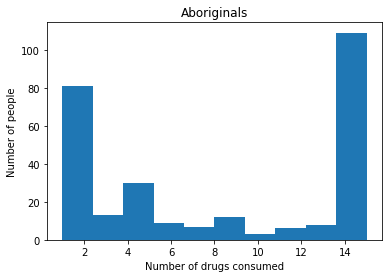

In [51]:
plt.hist(aborg['DRUG_HISTORY'])
plt.title('Aboriginals')
plt.xlabel('Number of drugs consumed')
plt.ylabel('Number of people')

In [43]:
non_aborg = non_aborg_df[non_aborg_df['DRUG_HISTORY']>0] #removing rows with no drug abuse
non_aborg.shape

(3575, 141)

Text(0, 0.5, 'Number of people')

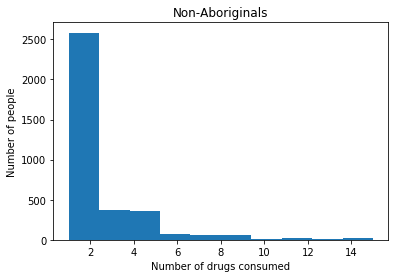

In [50]:
plt.hist(non_aborg['DRUG_HISTORY'])
plt.title('Non-Aboriginals')
plt.xlabel('Number of drugs consumed')
plt.ylabel('Number of people') 

In [15]:
#filling NA values with 0
for i in med_nmu:
    aborg_df[i] = aborg_df[i].fillna(0)
    non_aborg_df[i] = non_aborg_df[i].fillna(0)

C:\Users\vansh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vansh\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
(aborg_df[med_nmu].apply(pd.Series.value_counts)/aborg_df.shape[0]).round(5) 

,FENT_NMU,BUP_NMU,METH_NMU,MORPH_NMU,OXY_NMU,OXYM_NMU,TRAM_NMU,TAP_NMU,COD_NMU,COTC_NMU,HYD_NMU,HYDM_NMU,SUF_NMU,STIM_NMU,BENZ_NMU,THC_NMU,OTH_RX_DRUG_USE
0.0,0.96536,0.97229,0.9746,0.94919,0.94688,0.95612,0.96305,0.9746,0.84758,0.85219,0.96767,0.95381,0.97691,0.96074,0.97229,0.96305,0.93303
1.0,0.03464,0.02771,0.0254,0.05081,0.05312,0.04388,0.03695,0.0254,0.15242,0.14781,0.03233,0.04619,0.02309,0.03926,0.02771,0.03695,0.06697


In [17]:
(non_aborg_df[med_nmu].apply(pd.Series.value_counts)/non_aborg_df.shape[0]).round(5) 

,FENT_NMU,BUP_NMU,METH_NMU,MORPH_NMU,OXY_NMU,OXYM_NMU,TRAM_NMU,TAP_NMU,COD_NMU,COTC_NMU,HYD_NMU,HYDM_NMU,SUF_NMU,STIM_NMU,BENZ_NMU,THC_NMU,OTH_RX_DRUG_USE
0.0,0.99634,0.99603,0.99561,0.9882,0.98308,0.99572,0.99238,0.99802,0.83695,0.817,0.99029,0.98997,0.99781,0.98485,0.98172,0.98976,0.95812
1.0,0.00366,0.00397,0.00439,0.0118,0.01692,0.00428,0.00762,0.00198,0.16305,0.183,0.00971,0.01003,0.00219,0.01515,0.01828,0.01024,0.04188


In [18]:
(non_aborg_df[hard_drug].apply(pd.Series.value_counts)/non_aborg_df.shape[0]).round(5) 

,CAN_REC_USE,COKE_USE,CRACK_USE,MDMA_USE,GHB_USE,HAL_USE,INH_USE,SPEED_USE,NPFENT_USE,HEROIN_USE,KET_USE,MEPH_USE,SPICE_USE,SAL_USE,STER_USE
1,0.64163,0.90652,0.97357,0.94078,0.97765,0.87038,0.97942,0.94506,0.99206,0.98579,0.98162,0.99269,0.99311,0.97869,0.98788
2,0.06142,0.00480,0.00240,0.00240,0.00178,0.00261,0.00272,0.00386,0.00292,0.00230,0.00240,0.00209,0.00136,0.00251,0.00272
3,0.02099,0.00501,0.00198,0.00230,0.00313,0.00303,0.00178,0.00272,0.00136,0.00240,0.00198,0.00146,0.00261,0.00157,0.00136
4,0.03499,0.00762,0.00219,0.00428,0.00178,0.00574,0.00104,0.00386,0.00115,0.00073,0.00230,0.00146,0.00125,0.00125,0.00157
5,0.24097,0.07604,0.01985,0.05024,0.01567,0.11824,0.01504,0.04450,0.00251,0.00877,0.01170,0.00230,0.00167,0.01598,0.00648


In [19]:
(aborg_df[hard_drug].apply(pd.Series.value_counts) /aborg_df.shape[0]).round(5) 

,CAN_REC_USE,COKE_USE,CRACK_USE,MDMA_USE,GHB_USE,HAL_USE,INH_USE,SPEED_USE,NPFENT_USE,HEROIN_USE,KET_USE,MEPH_USE,SPICE_USE,SAL_USE,STER_USE
1,0.41801,0.57044,0.64896,0.60970,0.68822,0.55658,0.67667,0.64203,0.69053,0.68360,0.69284,0.70670,0.70208,0.67898,0.69746
2,0.33025,0.05312,0.05081,0.03464,0.04619,0.25173,0.24249,0.24942,0.04619,0.03695,0.03002,0.03926,0.03464,0.02771,0.03695
3,0.04157,0.03233,0.02309,0.03002,0.22402,0.02771,0.02540,0.02771,0.22633,0.02771,0.03233,0.02309,0.03002,0.24942,0.24018
4,0.01848,0.23095,0.22402,0.22864,0.01386,0.01386,0.01386,0.01155,0.01848,0.22171,0.01386,0.01386,0.22633,0.00462,0.02309
5,0.19169,0.11316,0.05312,0.09700,0.02771,0.15012,0.04157,0.06928,0.01848,0.03002,0.23095,0.21709,0.00693,0.03926,0.00231


Text(0, 0.5, 'Number of people')

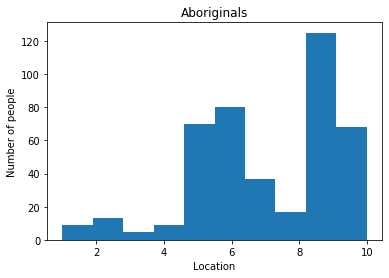

In [56]:
plt.hist(aborg_df['DEM_LOCATION']) #aboriginal with location
plt.title('Aboriginals')
plt.xlabel('Location')
plt.ylabel('Number of people') 

Text(0, 0.5, 'Number of people')

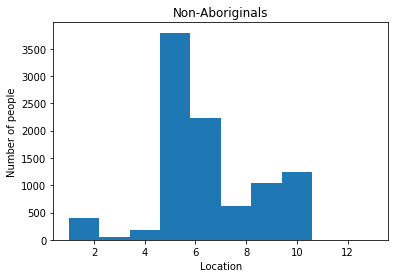

In [57]:
plt.hist(non_aborg_df['DEM_LOCATION']) #non-aboriginal with location
plt.title('Non-Aboriginals')
plt.xlabel('Location')
plt.ylabel('Number of people') 

In [82]:
aborg_df['DEM_LOCATION'].value_counts() 

9     125
6      80
5      70
10     68
7      37
8      17
2      13
4       9
1       9
3       5
Name: DEM_LOCATION, dtype: int64

In [83]:
non_aborg_df['DEM_LOCATION'].value_counts()

5     3793
6     2232
10    1249
9     1047
7      342
2      295
8      272
4      182
1      108
3       51
13       2
12       1
Name: DEM_LOCATION, dtype: int64

Text(0, 0.5, 'Number of people')

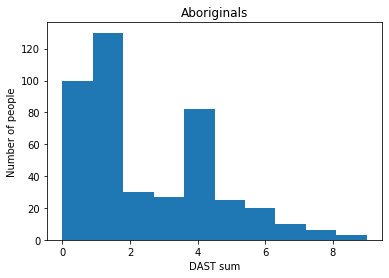

In [65]:
plt.hist(aborg_df['DAST_SUM'])
plt.title('Aboriginals')
plt.xlabel('DAST sum')
plt.ylabel('Number of people') 

Text(0, 0.5, 'Number of people')

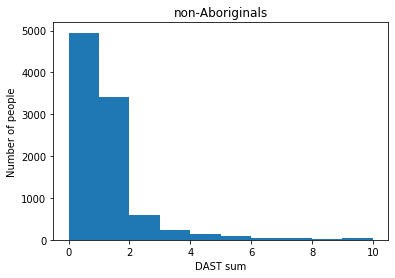

In [66]:
plt.hist(non_aborg_df['DAST_SUM'])
plt.title('non-Aboriginals')
plt.xlabel('DAST sum')
plt.ylabel('Number of people') 

In [69]:
aborg_df['DAST_SUM'].mean()

2.284064665127021

In [70]:
non_aborg_df['DAST_SUM'].mean()

0.7827449341967829

In [78]:
aborg_df[aborg_df['DAST_SUM']>2].shape[0]/aborg_df.shape[0]  #proportion of aboriginal

0.3995381062355658

In [79]:
non_aborg_df[non_aborg_df['DAST_SUM']>2].shape[0]/non_aborg_df.shape[0] #proportion of non-aboriginal

0.0644453728848966

In [84]:
alb_aborg = aborg_df[aborg_df['DEM_LOCATION']==9] # alberta
alb_non_aborg = non_aborg_df[non_aborg_df['DEM_LOCATION']==9]

Text(0, 0.5, 'Number of people')

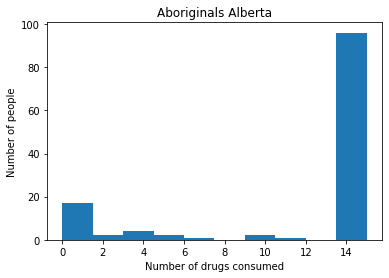

In [97]:
plt.hist(alb_aborg['DRUG_HISTORY'])
plt.title('Aboriginals Alberta')
plt.xlabel('Number of drugs consumed')
plt.ylabel('Number of people') 

Text(0, 0.5, 'Number of people')

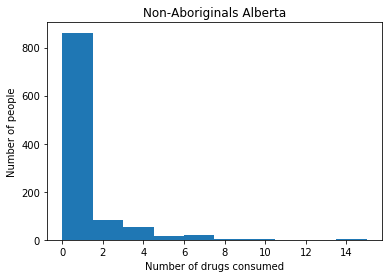

In [98]:
plt.hist(alb_non_aborg['DRUG_HISTORY'])
plt.title('Non-Aboriginals Alberta')
plt.xlabel('Number of drugs consumed')
plt.ylabel('Number of people') 

In [91]:
alb_aborg[alb_aborg['DRUG_HISTORY']>10].shape[0]/alb_aborg.shape[0] #proportion of aboriginal

0.776

In [92]:
alb_non_aborg[alb_non_aborg['DRUG_HISTORY']>10].shape[0]/alb_non_aborg.shape[0] #proportion of non-aboriginal

0.004775549188156638